<a href="https://colab.research.google.com/github/ritabandutta13/CE888/blob/main/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
  arr=[]
  for i in range(n_bootstraps):
    arr.append(np.mean(np.random.choice(x,sample_size,replace=True)))
  data_mean=np.mean(np.mean(arr))
  lower=np.percentile(arr,2.5)
  upper=np.percentile(arr,97.5)

  return data_mean, lower, upper
print(bootstrap_mean([1,2,3,4,5,6,7,8,9,10],10,8))

(5.6875, 4.9350000000000005, 6.5825)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

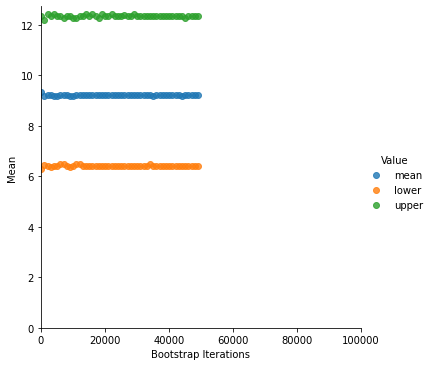

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  ci_low=(100-ci)/2
  ci_hi=ci+ci_low
  # print(ci_low,ci_hi)
  arr=[]
  # print(np.random.choice(x,sample_size))
  for i in range(0,n_bootstraps):
    arr.append(np.mean(np.random.choice(sample,sample_size)))
  data_mean=np.mean(arr)
  lower=np.percentile(arr,ci_low)
  upper=np.percentile(arr,ci_hi)
  return data_mean, lower, upper

In [6]:
print(np.percentile([1,2,3,4,5,6,7,8,9,10],90))

9.1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

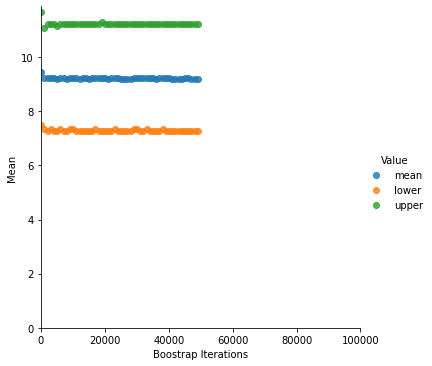

In [7]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [8]:

# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data1_curr = df.values.T[0]
data2_new = df.values.T[1]
data2_new = data2_new[~np.isnan(data2_new)]
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


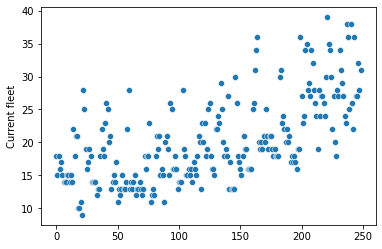

In [9]:
sns.scatterplot(data=df['Current fleet'])

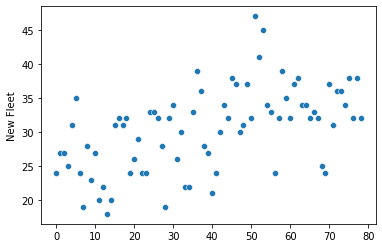

In [10]:
sns.scatterplot(data=df['New Fleet'])

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [11]:
# <---INSERT YOUR CODE HERE--->
print("current fleet mean",np.mean(data1_curr))
print("new fleet mean",np.mean(data2_new))




current fleet mean 20.14457831325301
new fleet mean 30.481012658227847


In [12]:
# Customer data
bootstrap_mean_ci(data,len(data),10000,95)

(9.224042857142857, 6.5, 12.357142857142858)

In [13]:
# Old data
bootstrap_mean_ci(data1_curr,len(data1_curr),10000,80)

(20.150450602409638, 19.626506024096386, 20.674698795180724)

In [14]:

# new fleet
bootstrap_mean_ci(data2_new,len(data2_new),10000,95)

(30.477817721518992, 29.126582278481013, 31.835443037974684)

In [15]:
 def bootstrap_mean_ci_sd(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  ci_low=(100-ci)/2
  ci_high=ci+ci_low
  # print(ci_low,ci_hi)
  array=[]
  # print(np.random.choice(x,sample_size))
  for i in range(0,n_bootstraps):
    array.append(np.std(np.random.choice(sample,sample_size)))
  data_mean=np.std(array)
  lower=np.percentile(array,ci_low)
  upper=np.percentile(array,ci_high)
  return data_mean, lower, upper

In [16]:
# new fleet sd
bootstrap_mean_ci_sd(data2_new,len(data2_new),10000,99)

(0.44867657595523514, 4.905478136143032, 7.202913669313343)

In [17]:
# Old data
bootstrap_mean_ci_sd(data1_curr,len(data1_curr),10000,73)

(0.2914538656749181, 6.0579317526998455, 6.7038832125919114)

In [18]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    
    concat=np.concatenate([sample1,sample2])
    count=0
    # np.random.seed(0)
    gt=np.mean(sample2)-np.mean(sample1)
    # print(concat)
    for i in range(n_permutations):
      perm_arr=np.random.permutation(concat)
      k=np.mean(perm_arr[:len(sample1)]) - np.mean(perm_arr[len(sample1):])
      if(k > gt):
        count=count+1




    pvalue=count/n_permutations
   
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    return pvalue

In [19]:
permut_test(data1_curr,data2_new,3000)

0.0

In [20]:
 def bootstrap_mean_ci_sd(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  ci_low=(100-ci)/2
  ci_hi=ci+ci_low
  # print(ci_low,ci_hi)
  arr=[]
  # print(np.random.choice(x,sample_size))
  for i in range(0,n_bootstraps):
    arr.append(np.std(np.random.choice(sample,sample_size)))
  data_mean=np.std(arr)
  lower=np.percentile(arr,ci_low)
  upper=np.percentile(arr,ci_hi)
  return data_mean, lower, upper

In [21]:
bootstrap_mean_ci_sd(data1_curr,data1_curr.size,10000,73)

(0.2927280822738237, 6.057662429201276, 6.704612216225245)

In [22]:
bootstrap_mean_ci_sd(data,data.size,10000,95)

(1.2016396447002473, 2.7179720851283062, 7.372046277907646)

In [23]:
bootstrap_mean_ci_sd(data,len(data),10000,90)

(1.2026488516144507, 3.0203392159808535, 7.136139691655042)

In [24]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [25]:
# mean PA & OH
len(dem_share_OH)

88

In [26]:
print(np.mean(dem_share_PA),np.mean(dem_share_OH))

45.476417910447765 44.31818181818182


In [27]:
bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),100000,98)

(44.322294110227276, 41.874995454545456, 46.752731818181815)

In [28]:
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),100000,98)

(45.47970744776121, 42.80671343283582, 48.3198537313433)

In [29]:
print(permut_test(dem_share_OH,dem_share_PA,30000))

0.2359
